##                                                           LAB 2

# sum()

 **.sum() is a method in pandas, which returns the sum of values for the requested axis. It can be applied to a pandas DataFrame or Series.**



Here's an example of how to use .sum() in pandas:

In [ ]:
import pandas as pd
import numpy as np

# create a sample dataframe
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)
df.head()

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


axis=0 specifies the sum along the columns, while axis=1 specifies the sum along the rows.

In [ ]:
'''
sum() method by default is operating column-wise if the axis parameter is not specified.
axis=0 or axis='index': The function is applied column-wise, so you get results for each column.
axis=1 or axis='columns': The function is applied row-wise, so you get results for each row.
'''

# sum along the columns (axis=0)
col_sum = df.sum(axis=0)
print(col_sum)

A     6
B    15
C    24
dtype: int64


In [ ]:
# sum along the columns (axis=1)
col_sum = df.sum(axis=1)
print(col_sum)

0    12
1    15
2    18
dtype: int64


In [ ]:
# sum along the columns (axis=0) using a for loop
col_sum = {}
for col in df.columns:
    col_sum[col] = 0
    for value in df[col]:
        col_sum[col] += value

print(pd.Series(col_sum))


A     6
B    15
C    24
dtype: int64


# max()






**In pandas, .max() is a method used to return the maximum value of a particular column or a group of columns in a dataframe.**

Here's an example:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a sample dataframe
data = {'Name': ['John', 'Caty', 'Lisa', 'Yan', 'Dhoni','Mahi','Rosy','Elon','Princey','Dena'],
        'Car_Make': ['Honda', 'Tesla', 'Kia', 'Toyota', 'BMW','Kia','Kia','Honda','Toyota','Toyota'],
        'Age': [25, 22, 27, 22, 35, 34, 67, 19, 50, 25],
        'Age_Cohort': ['21-30', '21-30', '21-30', '21-30', '31-40', '31-40', '61-70', '11-20', '41-50', '21-30'],
        'Purchased':[np.nan, 1.0, 1.0, np.nan, 1.0, 1.0, 1.0, 1.0, np.nan, 1.0],
        'Price': [np.nan,"$75,000", "$50,000", np.nan, "$69,000", "$50,000","$45,000", "$79,000", np.nan, "$30,000"],
        'Down_Payment': [np.nan, "50%", "78%", np.nan, "50%", "35%", "25%", "35%", np.nan, "10%"],
        'Salary': [50000, 75000, 60000, 45000, 80000, 150000, 60000, 40000, 378000, 65000]}

df = pd.DataFrame(data)
df.head(10)

,Name,Car_Make,Age,Age_Cohort,Purchased,Price,Down_Payment,Salary
0,John,Honda,25,21-30,NaN,NaN,NaN,50000
1,Caty,Tesla,22,21-30,1.0,"$75,000",50%,75000
2,Lisa,Kia,27,21-30,1.0,"$50,000",78%,60000
3,Yan,Toyota,22,21-30,NaN,NaN,NaN,45000
4,Dhoni,BMW,35,31-40,1.0,"$69,000",50%,80000
5,Mahi,Kia,34,31-40,1.0,"$50,000",35%,150000
6,Rosy,Kia,67,61-70,1.0,"$45,000",25%,60000
7,Elon,Honda,19,11-20,1.0,"$79,000",35%,40000
8,Princey,Toyota,50,41-50,NaN,NaN,NaN,378000
9,Dena,Toyota,25,21-30,1.0,"$30,000",10%,65000


In [ ]:
# Using .max() to find the maximum value of the 'Salary' column
max_salary = df['Salary'].max()

print('The maximum salary is:', max_salary)

The maximum salary is: 378000


In [ ]:
# Using .max() to find the maximum value of the 'Age' column
max_age = df['Age'].max()

print('The maximum age is:', max_age)

The maximum age is: 67


In [ ]:
# Using .max() to find the maximum value of the 'Name' column
max_name = df['Name'].max()

print('The name is:', max_name)

The name is: Yan


The output of df['Name'].max() will be the name that appears last when sorted in alphabetical order, which in this case is 'Yan'. It is important to note that applying .max() on a non-numeric column such as 'Name' may not provide meaningful information in most cases, since it is typically used to obtain the maximum value in a numeric column.

In [ ]:
# find max age using a for loop
max_age = df['Age'][0]
for i in range(1, len(df['Age'])):
    if df['Age'][i] > max_age:
        max_age = df['Age'][i]

print("The maximum age is:", max_age)


The maximum age is: 67


## QUESTION 0

## Cleaning the Dataset

In [ ]:
# We have to select only the columns you want to modify
cols_to_modify = ['Purchased']

# Filling NaNs with 0s for the selected columns
df[cols_to_modify] = df[cols_to_modify].fillna(0)

# Printing the modified dataframe
df.head()


,Name,Car_Make,Age,Age_Cohort,Purchased,Price,Down_Payment,Salary
0,John,Honda,25,21-30,0.0,NaN,NaN,50000
1,Caty,Tesla,22,21-30,1.0,"$75,000",50%,75000
2,Lisa,Kia,27,21-30,1.0,"$50,000",78%,60000
3,Yan,Toyota,22,21-30,0.0,NaN,NaN,45000
4,Dhoni,BMW,35,31-40,1.0,"$69,000",50%,80000


**Notice that Price and Down_Payment are currently being treated as categorical variables (dtype: object). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a dtype of int or float) because we'll need to perform mathematical operations on these columns.**

**Categorical Variable to Numerical Variable**

In [ ]:
print(df['Price'].dtype)
print(df['Down_Payment'].dtype)
print(df['Age'].dtype)
print(df['Name'].dtype)

object
object
int64
object


**Reason??**

In [ ]:
# replace the dollar symbol and comma with nothing
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

# convert the Price column to float
df['Price'] = df['Price'].astype(float)


**Is it working when we try to change it to integer variable rather than a float variable. If not, what might be the reason?**

In [ ]:
#df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')
#df['Price'] = df['Price'].astype(int)

**You will get an error "ValueError: cannot convert float NaN to integer".**

**The reason why this code is not working to change the 'Price' column to an integer variable is because some of the values in the column contain missing values (NaN), which cannot be converted to an integer using the astype(int) method.**

**To fix this, you can first replace the missing values with 0 using the fillna() method, and then apply the .str.replace() and astype(int) methods.**

**It's working with float because the astype method can convert a string to a float, but not to an integer if there are any non-numeric characters in the string. In the case of the "Price" column, the dollar symbol, is causing the conversion to fail when we try to cast to an integer.**

**The reason why it is not working with int is that some of the values in the 'Price' column are missing (NaN). When the 'Price' column contains NaN values, pandas interprets the entire column as a float, since NaN is a special floating-point value in Python. However, it is not possible to convert NaN to an integer using the astype(int) method, hence the error message "ValueError: cannot convert float NaN to integer". On the other hand, when using float,it works because pandas is able to interpret the NaN values as floating-point values.**


In [ ]:
# fill missing values with 0
#df['Down_Payment'] = df['Down_Payment'].fillna('0')

# remove '%' symbol and convert to int
df['Down_Payment'] = df['Down_Payment'].str.replace('%', '').astype(float)


In [ ]:
df

,Name,Car_Make,Age,Age_Cohort,Purchased,Price,Down_Payment,Salary
0,John,Honda,25,21-30,0.0,NaN,NaN,50000
1,Caty,Tesla,22,21-30,1.0,75000.0,50.0,75000
2,Lisa,Kia,27,21-30,1.0,50000.0,78.0,60000
3,Yan,Toyota,22,21-30,0.0,NaN,NaN,45000
4,Dhoni,BMW,35,31-40,1.0,69000.0,50.0,80000
5,Mahi,Kia,34,31-40,1.0,50000.0,35.0,150000
6,Rosy,Kia,67,61-70,1.0,45000.0,25.0,60000
7,Elon,Honda,19,11-20,1.0,79000.0,35.0,40000
8,Princey,Toyota,50,41-50,0.0,NaN,NaN,378000
9,Dena,Toyota,25,21-30,1.0,30000.0,10.0,65000


In [ ]:
print(df['Price'].dtype)
print(df['Down_Payment'].dtype)
print(df['Age'].dtype)
print(df['Name'].dtype)

float64
float64
int64
object


## QUESTION 1

## Which Car was Worth the Most?

**The value of a car is how much it is worth. If someone pays \\$20,000 for a 10\% Down_Payment, then this means the car must be valued at \\$200,000, since 10% of \\$200,000 is $20,000.**

**Calculate the valuation of each car that was purchased. Which car was most valuable? Is it the same as the car that received the largest total Price from the customer?**

**We have to now calculate total value of the car. How to do it? We have the price, which indicates how much the customer paid and the Down_Payment percentage which tells how much percentage of the total amount did the customer pay.**

**Down_Payment * Value = Price**

**Value = Price/Down_Payment**

In [ ]:
# Calculate the valuation of each purchased car
df['Value'] = df['Price'] / (df['Down_Payment'] / 100)

# Get the index of the most valuable car
most_valuable_car_index = df['Value'].idxmax()

# Use df.loc to get the most valuable car's details
most_valuable_car = df.loc[most_valuable_car_index, 'Car_Make']

# Get the index of the car that received the highest payment from the customer
highest_payment_car_index = df['Price'].idxmax()

# Use df.loc to get the car's details
highest_payment_car = df.loc[highest_payment_car_index, 'Car_Make']

# Print the results
print("The most valuable car is "+ most_valuable_car)
print("The car that received the highest payment from the customer is "+ highest_payment_car)

The most valuable car is Toyota
The car that received the highest payment from the customer is Honda


In [ ]:
df

,Name,Car_Make,Age,Age_Cohort,Purchased,Price,Down_Payment,Salary,Value
0,John,Honda,25,21-30,0.0,NaN,NaN,50000,NaN
1,Caty,Tesla,22,21-30,1.0,75000.0,50.0,75000,150000.000000
2,Lisa,Kia,27,21-30,1.0,50000.0,78.0,60000,64102.564103
3,Yan,Toyota,22,21-30,0.0,NaN,NaN,45000,NaN
4,Dhoni,BMW,35,31-40,1.0,69000.0,50.0,80000,138000.000000
5,Mahi,Kia,34,31-40,1.0,50000.0,35.0,150000,142857.142857
6,Rosy,Kia,67,61-70,1.0,45000.0,25.0,60000,180000.000000
7,Elon,Honda,19,11-20,1.0,79000.0,35.0,40000,225714.285714
8,Princey,Toyota,50,41-50,0.0,NaN,NaN,378000,NaN
9,Dena,Toyota,25,21-30,1.0,30000.0,10.0,65000,300000.000000


## QUESTION 2

**From the dataset, we will calculate which car_make is highest in sales value**

In [ ]:
"""
We already calculated value in previous question,
so we can use that and just add values of cars from same makers.
"""
dp=df.groupby('Car_Make')['Value'].sum()

print(dp)

# Get the index of the car that received the highest payment from the customer
print(dp.idxmax()+" is highest in terms of total sales value")


Car_Make
BMW       138000.000000
Honda     225714.285714
Kia       386959.706960
Tesla     150000.000000
Toyota    300000.000000
Name: Value, dtype: float64
Kia is highest in terms of total sales value


## Question 3. Do the Customers Prefer Certain Cars?

**Calculate the proportion of purchased cars for each car brand. Make a visualization showing this information.**

In [ ]:
# Calculate the proportion of purchased cars for each brand
purchased_counts = df.groupby('Car_Make')['Purchased'].sum()
total_counts = df['Car_Make'].value_counts()
purchased_proportions = purchased_counts / total_counts

In [ ]:
df

,Name,Car_Make,Age,Age_Cohort,Purchased,Price,Down_Payment,Salary,Value
0,John,Honda,25,21-30,0.0,NaN,NaN,50000,NaN
1,Caty,Tesla,22,21-30,1.0,75000.0,50.0,75000,150000.000000
2,Lisa,Kia,27,21-30,1.0,50000.0,78.0,60000,64102.564103
3,Yan,Toyota,22,21-30,0.0,NaN,NaN,45000,NaN
4,Dhoni,BMW,35,31-40,1.0,69000.0,50.0,80000,138000.000000
5,Mahi,Kia,34,31-40,1.0,50000.0,35.0,150000,142857.142857
6,Rosy,Kia,67,61-70,1.0,45000.0,25.0,60000,180000.000000
7,Elon,Honda,19,11-20,1.0,79000.0,35.0,40000,225714.285714
8,Princey,Toyota,50,41-50,0.0,NaN,NaN,378000,NaN
9,Dena,Toyota,25,21-30,1.0,30000.0,10.0,65000,300000.000000


In [ ]:
purchased_counts

Car_Make
BMW       1.0
Honda     1.0
Kia       3.0
Tesla     1.0
Toyota    1.0
Name: Purchased, dtype: float64

In [ ]:
total_counts

Toyota    3
Kia       3
Honda     2
BMW       1
Tesla     1
Name: Car_Make, dtype: int64

In [ ]:
purchased_proportions

BMW       1.000000
Honda     0.500000
Kia       1.000000
Tesla     1.000000
Toyota    0.333333
dtype: float64

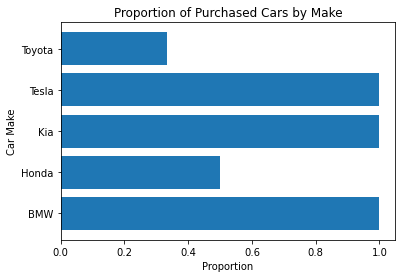

In [ ]:
#A horizontal bar chart to visualize the results
plt.barh(purchased_proportions.index, purchased_proportions.values)
plt.title('Proportion of Purchased Cars by Make')
plt.xlabel('Proportion')
plt.ylabel('Car Make')
plt.show()

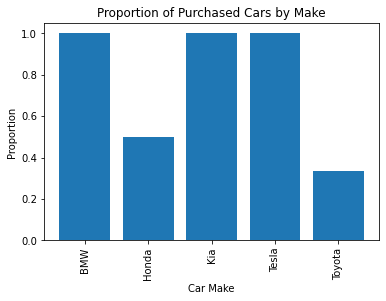

In [ ]:
#A vertical bar chart to visualize the results
plt.bar(purchased_proportions.index, purchased_proportions.values)
plt.xticks(rotation=90)
plt.title('Proportion of Purchased Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Proportion')
plt.show()

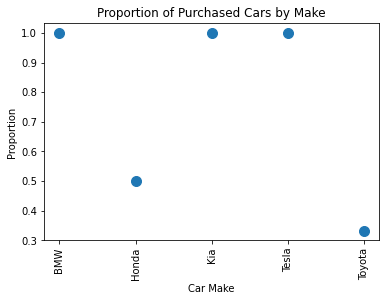

In [ ]:
#A scatter plot to visualize the results
plt.scatter(purchased_proportions.index, purchased_proportions.values, s=100)
plt.xticks(rotation=90)
plt.title('Proportion of Purchased Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Proportion')
plt.show()

## QUESTION 4

**Could you create a visualization comparing the average prices of Kia and Toyota cars, and share your observations based on the graph?**

**METHOD 1**

48333.333333333336
30000.0


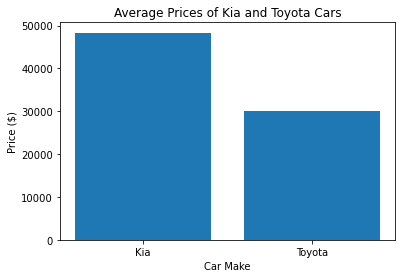

In [ ]:
# Filter data for Kia and Benz cars
kia_prices = df[df['Car_Make'] == 'Kia']['Price']
toyota_prices = df[df['Car_Make'] == 'Toyota']['Price']

# Calculate average prices
kia_avg_price = kia_prices.mean()
toyota_avg_price = toyota_prices.mean()

print(kia_avg_price)
print(toyota_avg_price)

# Create a bar chart to compare the average prices
plt.bar(['Kia', 'Toyota'], [kia_avg_price, toyota_avg_price])
plt.title('Average Prices of Kia and Toyota Cars')
plt.xlabel('Car Make')
plt.ylabel('Price ($)')
plt.show()

**METHOD 2**

<AxesSubplot:ylabel='Car_Make'>

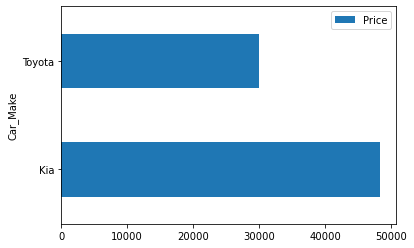

In [ ]:
table = pd.pivot_table(data = df , values = 'Price' , index = 'Car_Make' , aggfunc = 'mean' )
table.loc [ [ 'Kia' , 'Toyota' ] ].plot( kind = 'barh' )

## QUESTION 5

**Now, calculate the average price of the car by Car_Make and Age_Cohort. Make a graphic that compares the average prices of Kia cars and Toyota cars, within each age cohort.**

**Comment on what you see. How do these results appear to contradict the results you obtained in Question 4?**

<AxesSubplot:ylabel='Car_Make,Age_Cohort'>

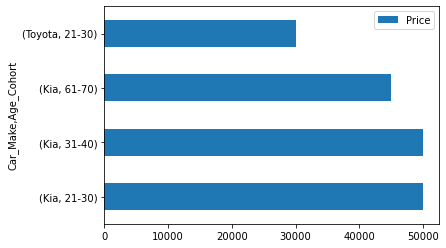

In [ ]:
table = pd.pivot_table(data = df , values = 'Price' , index = [ 'Car_Make' , 'Age_Cohort' ] , aggfunc = 'mean' )
table.loc [ [ 'Kia' , 'Toyota' ] ].plot( kind = 'barh' )